Goal of this notebook is to learn the followings - 

1. Image basics - Dimensions, Channels, Shape
2. Plotting Images, when they actually are just numbers!
3. Basic Data Prep for Image Data - Reshaping, Scaling
4. MLP - Dense Layers and Softmax in Keras
5. ConvNet - Conv Layer then Pooling Layer. Dropout, Dense and Flatten Layers
6. Training and Validation Accuracy and Loss using model training history

In [1]:
# Imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
#Create Train and Test Data - Keras by default returns tuples of data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Basic EDA on the data
print("Total number of Train Records : ", X_train.shape[0])
print("Total number of Test Records : ", X_test.shape[0])

Total number of Train Records :  60000
Total number of Test Records :  10000


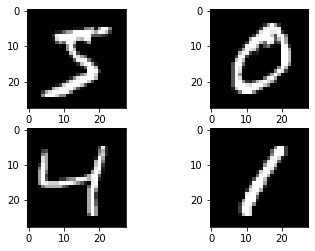

In [4]:
#Let's plot the data - Create a subplot with 4 images and visualize first 4 images
#Original Dataset is created using Gray Scale Images, So convert as such.

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

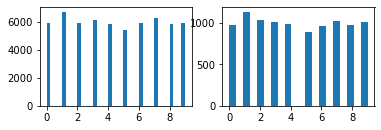

In [5]:
#Is there a class imbalance?

plt.subplot(221)
plt.hist(y_train, bins = 'auto')
plt.subplot(222)
plt.hist(y_test, bins = 'auto')
plt.show()

Test Data has no labels for digit 5. But training data seems reasonably balanced

#### Data Preparation

We need to perform basic data prep steps when dealing with image data like - 
1. Reshaping the input using pixels
2. Scaling (Gray Scale pixels range from 0 -255)
3. One hot encode the labels. Since the labels are 0-9, we don't want to add a bias to the model that 9 is more important than 0

But before all of this, let's create a Validation Data Set - Split test in 2 parts. We don't provide our model testing data during training. We don't do that here!

In [6]:
val_factor = 0.5
val_records = int(val_factor * X_test.shape[0])


X_val, y_val = X_test[:val_records], y_test[:val_records]
X_test, y_test = X_test[val_records:], y_test[val_records:]

In [7]:
#Get Image Size

print("Image Size : ", X_train[0].shape)
print("Image Vector Size : ", X_train[0].shape[0] * X_train[0].shape[1])

Image Size :  (28, 28)
Image Vector Size :  784


In [8]:
#We will convert array of size (28, 28) to vector of size (784, ). So 60000 images of (28,28) will become (60000, 784)
#Idea is to convert every image to the array of pixel values (every pixel has a numerical value associated with it)

num_of_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_of_pixels)
X_val = X_val.reshape(X_val.shape[0], num_of_pixels)
X_test = X_test.reshape(X_test.shape[0], num_of_pixels)

In [9]:
#Pixel values can be large numbers (For e.g, Gray Scale can be 0-255). It's a good idea to scale the numbers
X_train = X_train/255 #Taking advantage of numpy array division..... Cool, right!
X_val = X_val/255
X_test = X_test/255

In [10]:
#Using Numpy Utility built-in Keras - np_utils, one-hot encode labels

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

num_of_labels = y_train.shape[1]

#### Baseline Model

In [11]:
def baseline_model():
    #Create Model
    model = Sequential()
    model.add(Dense(num_of_pixels, input_dim = num_of_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_of_labels, activation='softmax'))
    
    #Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

In [12]:
#Build the model
model = baseline_model()


#Train the model. Saving model training history to plot train and val losses
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, batch_size=200, verbose=2)

#Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Score of the baseline model : ", score)

Epoch 1/10
300/300 - 4s - loss: 0.2764 - accuracy: 0.9212 - val_loss: 0.1800 - val_accuracy: 0.9486
Epoch 2/10
300/300 - 4s - loss: 0.1117 - accuracy: 0.9676 - val_loss: 0.1240 - val_accuracy: 0.9612
Epoch 3/10
300/300 - 4s - loss: 0.0717 - accuracy: 0.9797 - val_loss: 0.1060 - val_accuracy: 0.9684
Epoch 4/10
300/300 - 4s - loss: 0.0506 - accuracy: 0.9852 - val_loss: 0.0939 - val_accuracy: 0.9704
Epoch 5/10
300/300 - 4s - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 6/10
300/300 - 4s - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.0858 - val_accuracy: 0.9720
Epoch 7/10
300/300 - 4s - loss: 0.0189 - accuracy: 0.9956 - val_loss: 0.0841 - val_accuracy: 0.9726
Epoch 8/10
300/300 - 4s - loss: 0.0147 - accuracy: 0.9968 - val_loss: 0.0804 - val_accuracy: 0.9764
Epoch 9/10
300/300 - 4s - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 10/10
300/300 - 4s - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0891 - val_accuracy: 0.9726

In [13]:
#Convert Class Probabilities to Labels - Get Index where Probabilty is maximum

output = model.predict(X_test).argmax(axis=-1)

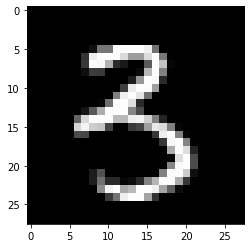

Model Output :  3


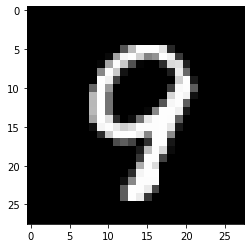

Model Output :  9


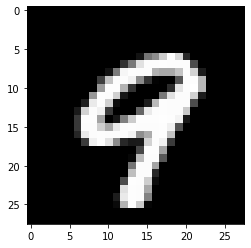

Model Output :  9


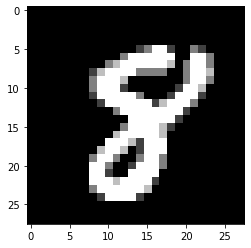

Model Output :  8


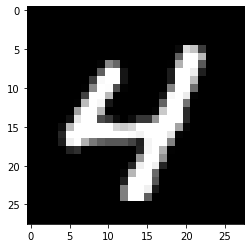

Model Output :  4


In [14]:
#Let's check 5 images and their predicted labels

for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    print("Model Output : ", output[i])

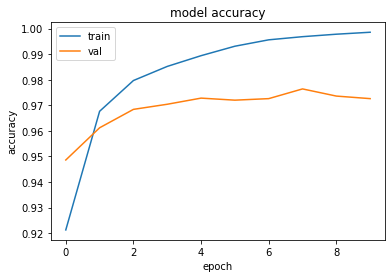

In [15]:
#Let's plot model accuracy and validation accuracy per epoch
#Here the accuracy numbers are pretty high, so not getting a good idea when to stop.
#But in practice, usually this gives a good idea about early stopping
#Use similar logic to plot training and validation loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### MNIST Dataset with Simple ConvNet 

Ofcourse we are going to start from scratch!!!!!

In [16]:
#Imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [17]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

For Conv2D, we need to follow this shape conventions - 

[SAMPLES][WIDTH][HEIGHT][CHANNELS]
(Samples or training data, one and the same thing)

Since we have gray-scale data, we have channel = 1, otherwise for e.g, for RGB, this would be 3

In [18]:
train_samples = X_train.shape[0]
train_width = X_train[0].shape[0]
train_height = X_train[0].shape[1]
train_channels = 1

test_samples = X_test.shape[0]
test_width = X_test[0].shape[0]
test_height = X_test[0].shape[1]
test_channels = 1

X_train = X_train.reshape(train_samples, train_width, train_height, train_channels)
X_test = X_test.reshape(test_samples, test_width, test_height, test_channels)

In [19]:
#Just like before, let's scale the data
X_train = X_train/255
X_test = X_test/255

In [20]:
#Just like before, let's One-Hot encode the data

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1] #Required for final Softmax layer

In [21]:
#Remember the words of great Andrew Ng, Conv layers is followed by Pooling Layer


def simple_convnet():
    #Create model
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape = (train_width, train_height,train_channels), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    #Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return(model)

In [22]:
#Build the model
model = simple_convnet()

#Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=200,verbose=2)

#Score the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Model Score : ", scores)

#Lessons learned - Complex models take longer to train.....DUHHHH!!!!

Epoch 1/10
240/240 - 27s - loss: 0.2794 - accuracy: 0.9205 - val_loss: 0.1050 - val_accuracy: 0.9700
Epoch 2/10
240/240 - 26s - loss: 0.0839 - accuracy: 0.9752 - val_loss: 0.0667 - val_accuracy: 0.9810
Epoch 3/10
240/240 - 26s - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 4/10
240/240 - 26s - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0514 - val_accuracy: 0.9849
Epoch 5/10
240/240 - 26s - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 6/10
240/240 - 26s - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0445 - val_accuracy: 0.9873
Epoch 7/10
240/240 - 26s - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0481 - val_accuracy: 0.9862
Epoch 8/10
240/240 - 26s - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 9/10
240/240 - 26s - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 10/10
240/240 - 26s - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.0413 - val_accura

In [23]:
#Convert Class Probabilities to Labels - Get Index where Probabilty is maximum

output = model.predict(X_test).argmax(axis=-1)

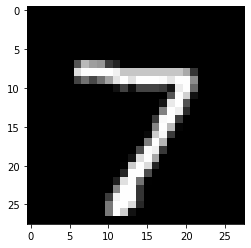

Model Output :  7


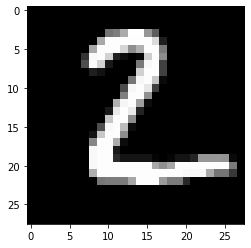

Model Output :  2


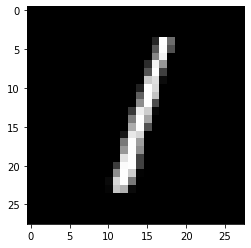

Model Output :  1


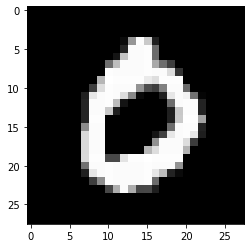

Model Output :  0


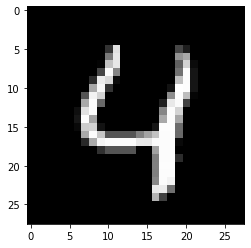

Model Output :  4


In [24]:
#Let's check 5 images and their predicted labels

for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    print("Model Output : ", output[i])

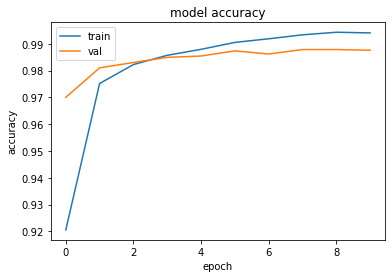

In [25]:
#Let's plot model accuracy and validation accuracy per epoch
#Just like earlier, the accuracy numbers are pretty high and need for this graph is pretty low

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()